In [1]:
import pandas as pd
df=pd.read_csv(r"C:\Users\shubh\Downloads\archive (31)\good_reads_top_1000_books.csv")
df.head()

,Book Name,Author,Average Rating,Number of Ratings,Score on Goodreads
0,To Kill a Mockingbird,Harper Lee,4.26,6129090,17358.0
1,1984,George Orwell,4.19,4604557,15474.0
2,Pride and Prejudice,Jane Austen,4.29,4273146,15135.0
3,Harry Potter and the Sorcerer's Stone (Harry P...,J.K. Rowling,4.47,10063128,12440.0
4,The Great Gatsby,F. Scott Fitzgerald,3.93,5244056,10828.0


using 'info' to get the details about the dataframe

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017 entries, 0 to 1016
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Book Name           1017 non-null   object 
 1   Author              1017 non-null   object 
 2   Average Rating      1017 non-null   float64
 3   Number of Ratings   1017 non-null   int64  
 4   Score on Goodreads  1017 non-null   float64
dtypes: float64(2), int64(1), object(2)
memory usage: 39.9+ KB


checking the 'object' datatype column unique values

In [3]:
df['Author'].nunique()

685

'Author' column has no use here, so dropping it from the dataset

In [4]:
df.drop('Author',axis=1,inplace=True)

checking the dataframe again

In [5]:
df.sample(3)

,Book Name,Average Rating,Number of Ratings,Score on Goodreads
601,Solomon Gursky Was Here,3.98,3041,96.0
648,Samarkand,4.24,28466,90.0
747,By Grand Central Station I Sat Down and Wept,3.53,5993,71.0


selecting the column for kmeans clustering

In [6]:
x=df.drop('Book Name',axis=1)
y=df['Book Name']

scaling the data 

In [7]:
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()
x_mms=mms.fit_transform(x)
x_mms

array([[8.20105820e-01, 6.09063517e-01, 1.00000000e+00],
       [7.83068783e-01, 4.57566361e-01, 8.91455897e-01],
       [8.35978836e-01, 4.24633113e-01, 8.71924872e-01],
       ...,
       [5.39682540e-01, 1.01588842e-03, 1.15227286e-04],
       [6.45502646e-01, 9.54078524e-04, 5.76136429e-05],
       [6.50793651e-01, 4.44792779e-04, 0.00000000e+00]])

ELBOW METHOD

In [8]:
#importing matplotlib 
import matplotlib.pyplot as plt

WCSS
 [31.008341711626123, 19.38501971663183, 12.015981997892812, 8.63495979555172, 6.724001577349648, 5.345558854110944, 4.603785541317457, 4.007163990879036, 3.7797207733617046, 3.261076597513883, 3.0724182965840283]


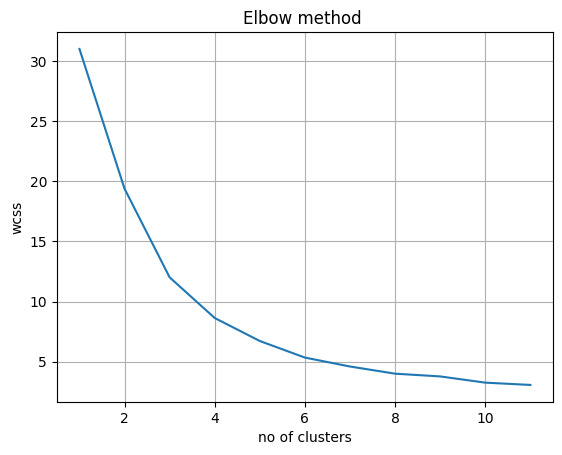

In [9]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,12):
    model=KMeans(n_clusters=i)
    model.fit(x_mms)
    wcss.append(model.inertia_)

print('WCSS\n',wcss)

plt.plot(list(range(1,12)),wcss)
plt.xlabel('no of clusters')
plt.ylabel('wcss')
plt.title('Elbow method ')
plt.grid()
plt.show()


From above plot , optimal no of clusters obtained is 4

In [10]:
k4=KMeans(n_clusters=4)
k4.fit(x_mms)

KMeans(n_clusters=4)

genrate the predictions

In [11]:
ypred_k4=k4.predict(x_mms)
print(ypred_k4)

[1 1 1 ... 3 3 3]


genrating the clusters centroid

In [12]:
cent_k4=k4.cluster_centers_
print(cent_k4)

[[0.74371197 0.01585495 0.03582548]
 [0.73441734 0.21792318 0.42054165]
 [0.38310658 0.00304871 0.01047416]
 [0.57898114 0.00494869 0.01667543]]


In [13]:
df['Cluster4']=ypred_k4
df.head()

,Book Name,Average Rating,Number of Ratings,Score on Goodreads,Cluster4
0,To Kill a Mockingbird,4.26,6129090,17358.0,1
1,1984,4.19,4604557,15474.0,1
2,Pride and Prejudice,4.29,4273146,15135.0,1
3,Harry Potter and the Sorcerer's Stone (Harry P...,4.47,10063128,12440.0,1
4,The Great Gatsby,3.93,5244056,10828.0,1


In [14]:
df['Cluster4'].value_counts()

Cluster4
3    502
0    333
2    141
1     41
Name: count, dtype: int64

In [28]:
df[['Book Name','Cluster4']].sort_values(by='Cluster4')

,Book Name,Cluster4
222,"Murder Must Advertise (Lord Peter Wimsey, #10)",0
281,Zorba the Greek,0
280,Midnight’s Children,0
559,"Exit Music (Inspector Rebus, #17)",0
278,"Gorky Park (Arkady Renko, #1)",0
...,...,...
507,La Disparition,3
1015,A Dark-Adapted Eye,3
509,G.,3
474,The Grass Is Singing,3
